In [1]:
from src.ConvolutionAutoEncoder import*


/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_epochs = 10
model = ConvAutoEncoder().to(device)



log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(model.train)
    for ix, (data, _) in enumerate(model.train):
        loss = model.train_batch(data)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')
        
    N = len(model.test)
    for ix, (data, _) in enumerate(model.test):
        loss = model.validate_batch(data)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        
    log.report_avgs(epoch+1)

EPOCH: 1.000	trn_loss: 0.165	val_loss: 0.081	(16.91s - 152.16s remaining)
EPOCH: 2.000	trn_loss: 0.073	val_loss: 0.065	(33.45s - 133.78s remaining)
EPOCH: 3.000	trn_loss: 0.063	val_loss: 0.058	(50.50s - 117.83s remaining)
EPOCH: 4.000	trn_loss: 0.057	val_loss: 0.053	(67.16s - 100.74s remaining)
EPOCH: 5.000	trn_loss: 0.054	val_loss: 0.051	(83.16s - 83.16s remaining)
EPOCH: 6.000	trn_loss: 0.052	val_loss: 0.050	(99.50s - 66.33s remaining)
EPOCH: 7.000	trn_loss: 0.050	val_loss: 0.047	(115.46s - 49.48s remaining)
EPOCH: 8.000	trn_loss: 0.048	val_loss: 0.047	(131.51s - 32.88s remaining)
EPOCH: 9.000	trn_loss: 0.047	val_loss: 0.045	(147.55s - 16.39s remaining)
EPOCH: 10.000	trn_loss: 0.046	val_loss: 0.044	(163.70s - 0.00s remaining)


100%|██████████| 111/111 [00:00<00:00, 421.79it/s]


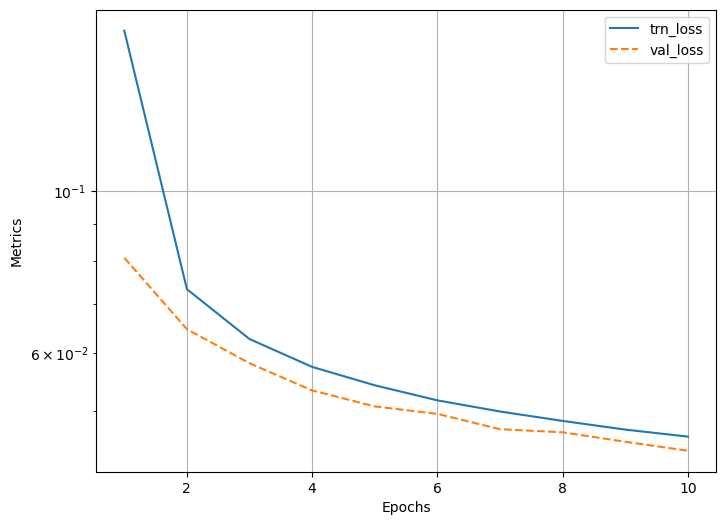

In [3]:
log.plot_epochs(log=True)

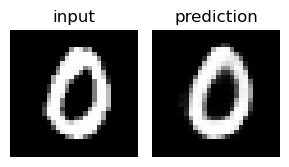

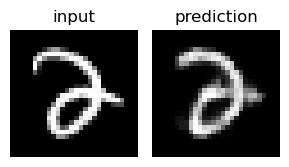

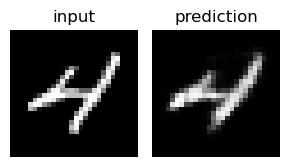

In [5]:
for _ in range(3):
    idx = np.random.randint(len(testing_data))
    im,_= testing_data[idx]
    _im = model.forward(im.to(device))
    fig, ax = plt.subplots(1,2,figsize=(3,3)) 
    show(im.squeeze(), ax=ax[0], title='input')
    show(_im.squeeze(), ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()